In [1]:
from src.acoustic_analyser import frame
import numpy as np

test_frame = frame.from_file(
    member_file="test_member.json", constraint_file="test_constraint.csv", debug=False
)

free_end = test_frame.fixed_end(member_id=0)
free_end = test_frame.free_end(member_id=1)

In [2]:
test_frame.get_determinant(w=10)

(-0.22419369236865638-0.008377076802613428j)


(-0.22419369236865638-0.008377076802613428j)

In [21]:
thetas = np.arange(0, 101, step=10)
natural_freqs = np.zeros(len(thetas))
initial_guess = 10

In [22]:
for i in range(len(thetas)):
    test_frame.constraints[0].theta = thetas[i] * np.pi / 180
    natural_freq = test_frame.get_natural_frequency_newton(initial_guess=initial_guess)
    natural_freqs[i] = natural_freq
    initial_guess = natural_freq
    print(thetas[i], "\t", end="\r")

(0.06396298103094948+0.2280615805008017j)
(0.06384549020944932+0.22755330249602088j)
(0.0019049901648508396+0.0057640171683418515j)
(5.241230561065713e-05+0.0001579577748211945j)
(3.925457349437308e-08+1.1829039994405709e-07j)
(8.146183950009014e-13+2.443067186223787e-12j)
(-0.00011008670297904541+0.004672523357116204j)
(-0.00010207840642191016+0.004353971825991497j)
(-4.4328495432871814e-08+2.027689543568178e-06j)
(-1.321726134518279e-11+9.978382813330106e-10j)
(-2.124611728719187e-11-4.095310973600563e-11j)
(-0.0029259075160733357+0.00995079615363211j)
(-0.0028860958688026635+0.009819470206097584j)
(-2.8377064685611027e-06+9.961531784836345e-06j)
(-3.001453698791545e-09+1.0539452596320553e-08j)
(-8.895291631059773e-13+9.543524112053158e-12j)
(-0.003530617116224158+0.009115901138422247j)
(-0.0035039901383942685+0.009050080788447558j)
(-4.439781812238516e-06+1.1992751096428818e-05j)
(-6.502691560008185e-09+1.7565507176651965e-08j)
(2.0956420017229284e-14-1.7942754537420675e-12j)
(-0.00

In [23]:
non_dimensional_natural_freq = test_frame.members[0].get_non_dimensional_freq(
    w=natural_freqs
)

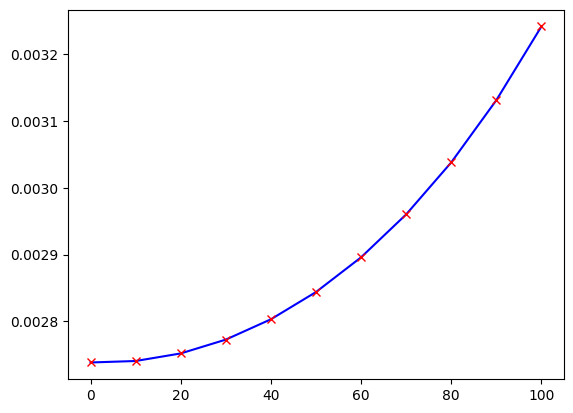

In [27]:
from matplotlib import pyplot as plt

plt.plot(thetas, non_dimensional_natural_freq, "b")
plt.plot(thetas, non_dimensional_natural_freq, "rx")

In [20]:
thetas

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100])